# Cas Kaggle: Brewer's Friend Beer Recipes

In [54]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns

In [28]:
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',', encoding='latin-1')
    return dataset

In [29]:
dataset = load_dataset('recipeData.csv')
data = dataset.values

In [30]:
#visualització de bles dades
dataset.head

<bound method NDFrame.head of        BeerID                                          Name  \
0           1                             Vanilla Cream Ale   
1           2                   Southern Tier Pumking clone   
2           3                   Zombie Dust Clone - EXTRACT   
3           4                 Zombie Dust Clone - ALL GRAIN   
4           5               Bakke Brygg Belgisk Blonde 50 l   
5           6                  Sierra Nevada Pale Ale Clone   
6           7      Russian River Pliny the Elder (original)   
7           8  Spotted Clown (New Glarus Spotted Cow clone)   
8           9                      Chocolate Vanilla Porter   
9          10                            Mango Habanero IPA   
10         11                     Bakke Brygg HveteIPA 25 L   
11         12                               Hop Notch Clone   
12         13                             Racer 5 IPA Clone   
13         14                     Sam Adams Rebel IPA Clone   
14         15            

In [22]:
dataset.columns

Index(['BeerID', 'Name', 'URL', 'Style', 'StyleID', 'Size(L)', 'OG', 'FG',
       'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity',
       'Efficiency', 'MashThickness', 'SugarScale', 'BrewMethod', 'PitchRate',
       'PrimaryTemp', 'PrimingMethod', 'PrimingAmount', 'UserId'],
      dtype='object')

In [31]:
#Elimino l'atribut URL ja que no em serveix per a l'estudi
df=dataset.drop('URL',axis=1)

In [32]:
df.head

<bound method NDFrame.head of        BeerID                                          Name  \
0           1                             Vanilla Cream Ale   
1           2                   Southern Tier Pumking clone   
2           3                   Zombie Dust Clone - EXTRACT   
3           4                 Zombie Dust Clone - ALL GRAIN   
4           5               Bakke Brygg Belgisk Blonde 50 l   
5           6                  Sierra Nevada Pale Ale Clone   
6           7      Russian River Pliny the Elder (original)   
7           8  Spotted Clown (New Glarus Spotted Cow clone)   
8           9                      Chocolate Vanilla Porter   
9          10                            Mango Habanero IPA   
10         11                     Bakke Brygg HveteIPA 25 L   
11         12                               Hop Notch Clone   
12         13                             Racer 5 IPA Clone   
13         14                     Sam Adams Rebel IPA Clone   
14         15            

In [39]:
#Elimino l'atribut Name del dataset a estudiar ja que tinc l'Atribut BeerID que en fa referència, el mateix amb Style i StyleID
df=df.drop('Name',axis=1)
df=df.drop('Style',axis=1)

In [40]:
df.head

<bound method NDFrame.head of        BeerID  StyleID  Size(L)     OG     FG   ABV     IBU  Color  BoilSize  \
0           1       45    21.77  1.055  1.013  5.48   17.65   4.83     28.39   
1           2       85    20.82  1.083  1.021  8.16   60.65  15.64     24.61   
2           3        7    18.93  1.063  1.018  5.91   59.25   8.98     22.71   
3           4        7    22.71  1.061  1.017  5.80   54.48   8.50     26.50   
4           5       20    50.00  1.060  1.010  6.48   17.84   4.57     60.00   
5           6       10    24.61  1.055  1.013  5.58   40.12   8.00     29.34   
6           7       86    22.71  1.072  1.018  7.09  268.71   6.33     30.28   
7           8       45    20.82  1.054  1.014  5.36   19.97   5.94     28.39   
8           9      129    22.71  1.060  1.016  5.77   31.63  34.76     30.28   
9          10       86    20.82  1.080  1.017  8.22   93.02   8.29     28.39   
10         11        7    25.00  1.064  1.014  6.63   64.26   7.78     29.00   
11        

In [42]:
#Anem a mirar quants valors tenim no existents:
print(df.isnull().sum())

BeerID               0
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2990
Efficiency           0
MashThickness    29864
SugarScale           0
BrewMethod           0
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67095
PrimingAmount    69087
UserId           50490
dtype: int64


In [49]:
#Elimino els atributs als que el falta més de la meitat de les dades:
for col in df.columns:
    if df[col].isnull().sum()>=(df.shape[0]/2):
        df=df.drop(col,axis=1)

In [51]:
#Comprovació de com em queden les dades:
print(df.isnull().sum())

BeerID               0
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2990
Efficiency           0
MashThickness    29864
SugarScale           0
BrewMethod           0
PrimaryTemp      22662
dtype: int64


In [63]:
columns=df.columns

<IPython.core.display.Javascript object>


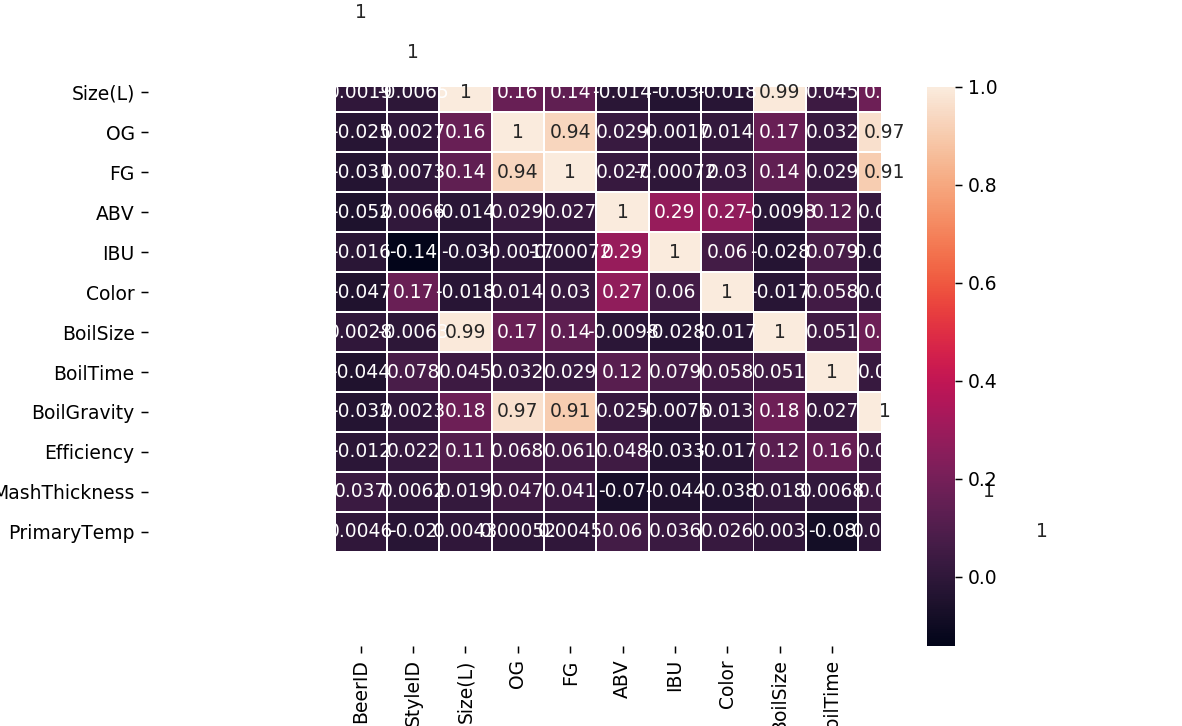

In [56]:
#Mirem la correlació entre les dades
correlacio = df.corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

<IPython.core.display.Javascript object>


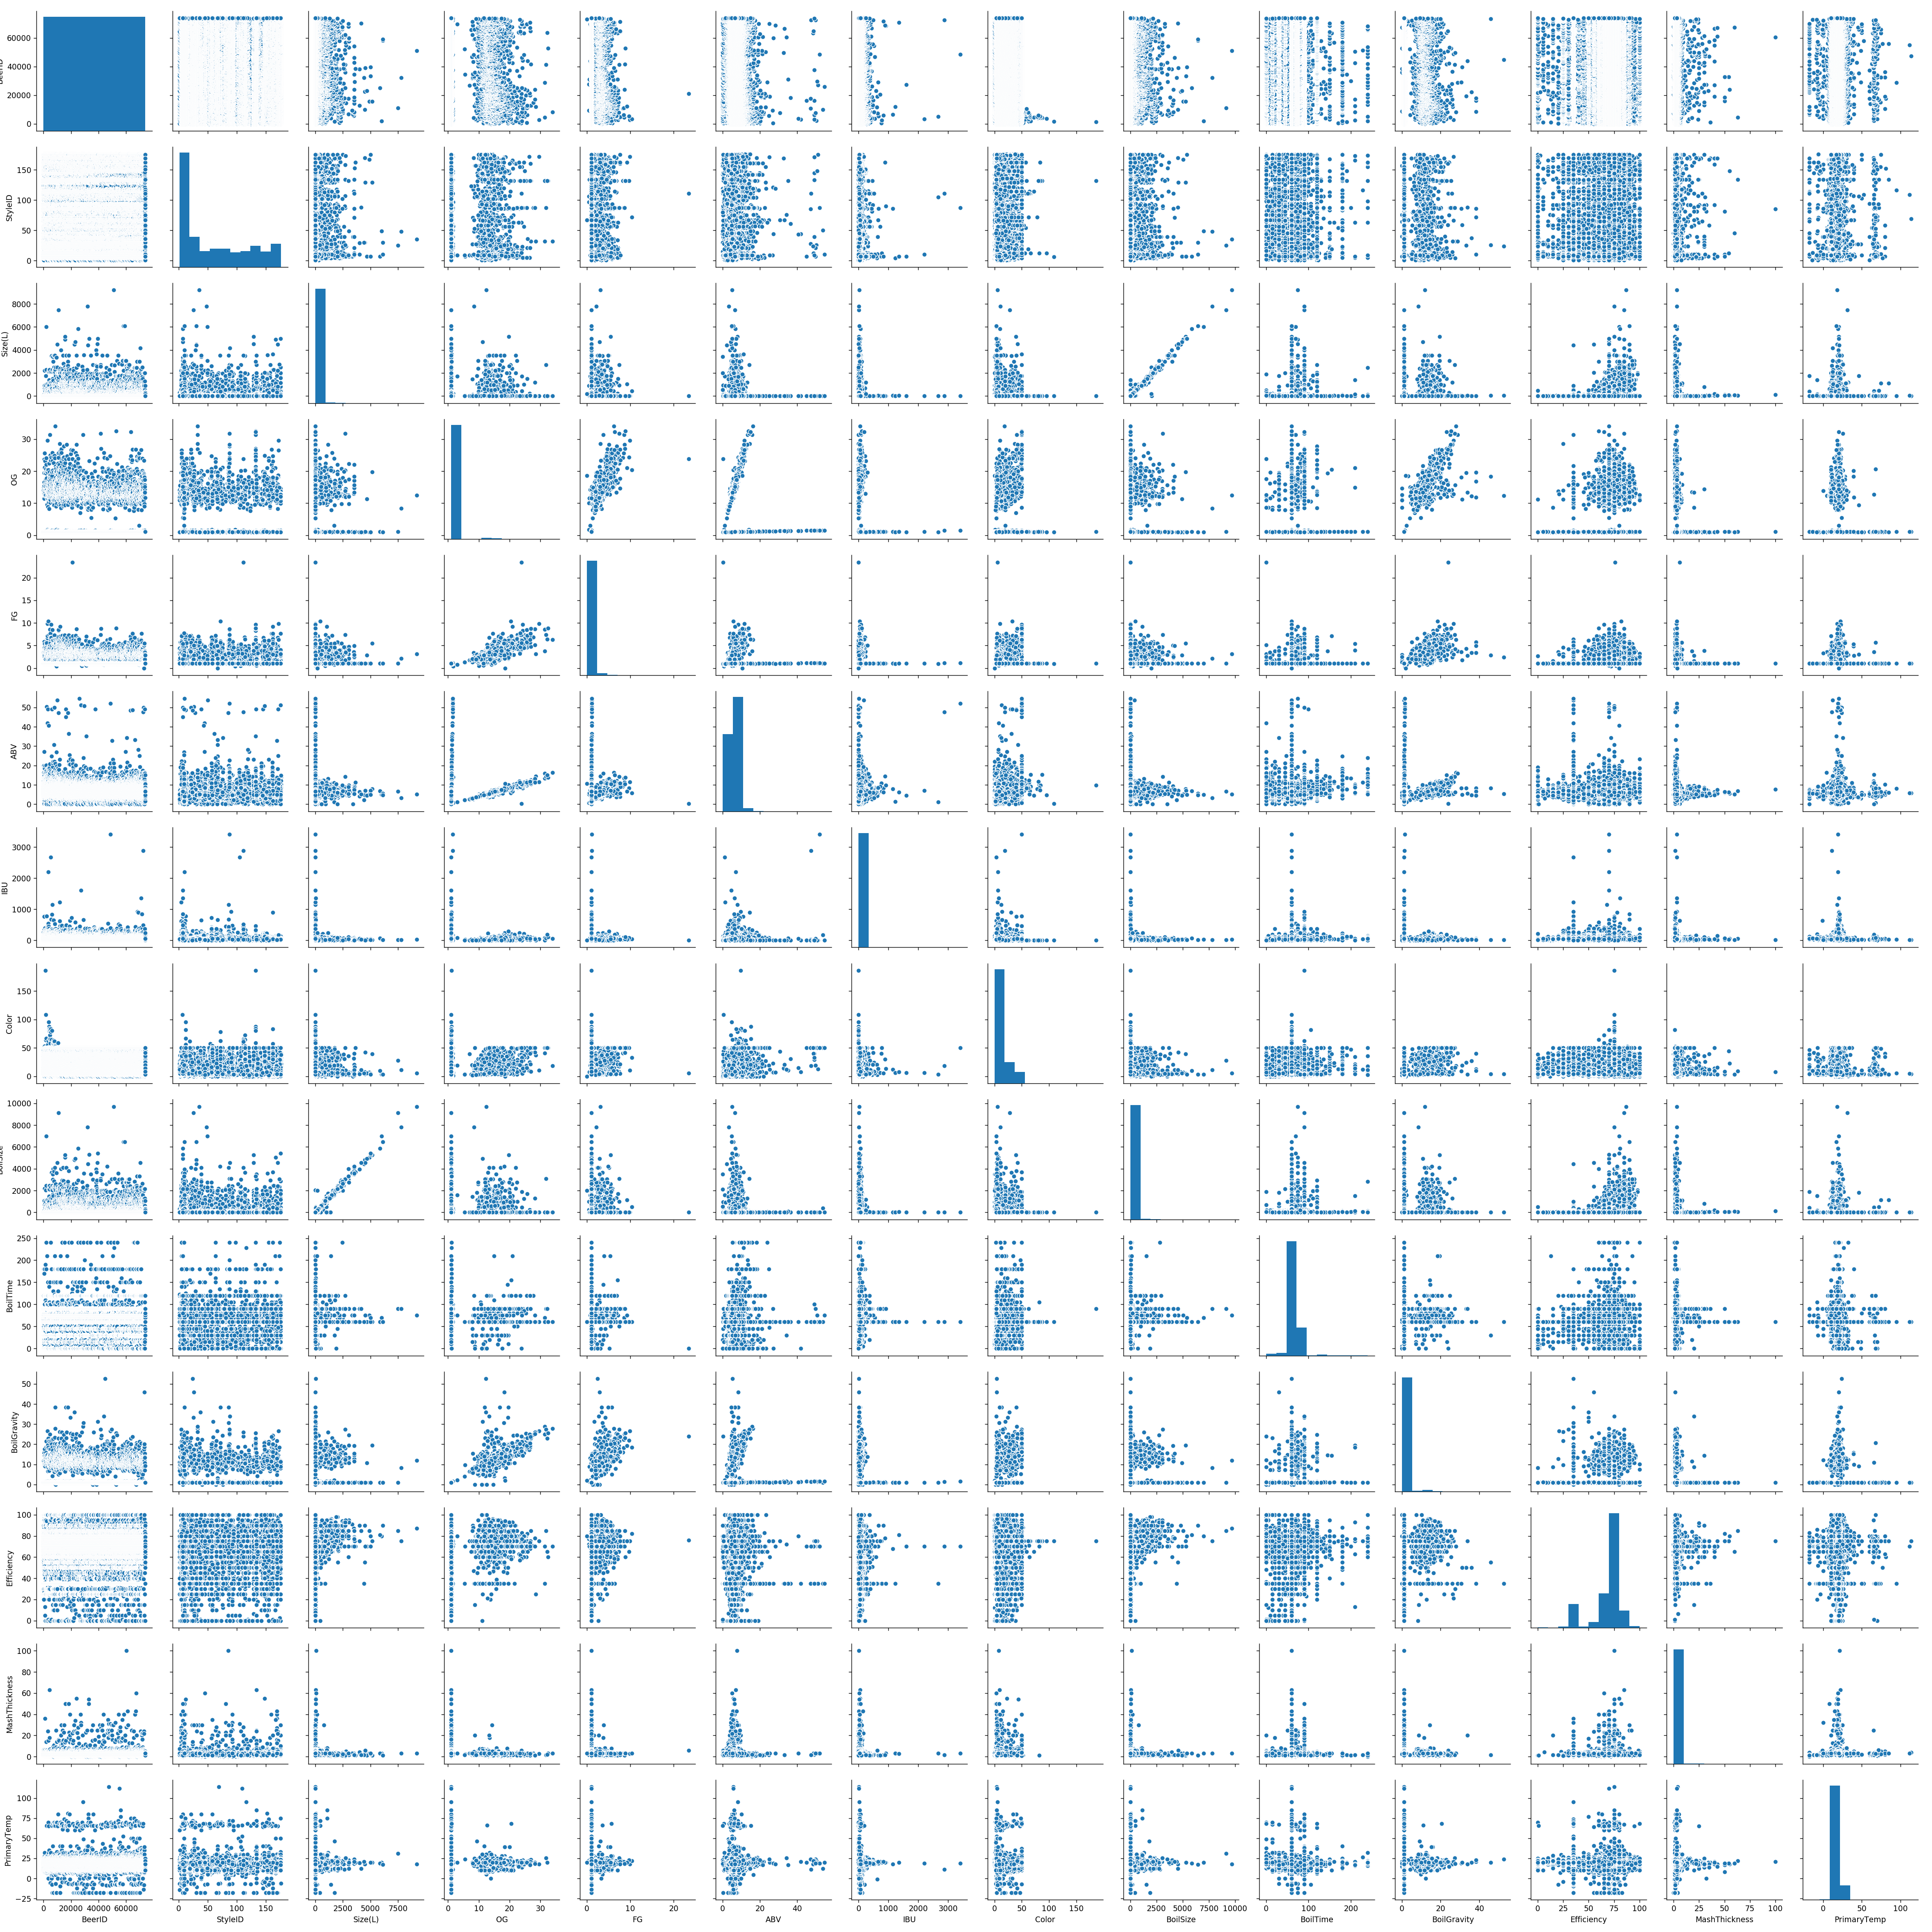

C:\Users\Clara\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Clara\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [55]:
#Visualització de les dades:
relacio = sns.pairplot(df)

In [69]:
#representacio de tots els atributs amb mes correlacio
# correlations = df.corr()
# correlations
# maj_cor=[corr for correlations.items(), corr in correlations.items() if corr > 0.6]
# plt.figure()

# ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

correlations = df.corr().abs()
for corr in correlations.items():
    print (corr)
# columns = [col for columns, corr in correlations.items() if corr > 0.6]
# maj_cor=df[columns].corr()
# plt.figure()

# ax = sns.heatmap(maj_cor, annot=True, linewidths=.5)

# ax = sns.pairplot(df[columns])

('BeerID', BeerID           1.000000
StyleID          0.074825
Size(L)          0.001924
OG               0.024895
FG               0.030662
ABV              0.051921
IBU              0.015845
Color            0.046867
BoilSize         0.002819
BoilTime         0.044273
BoilGravity      0.031692
Efficiency       0.011609
MashThickness    0.036604
PrimaryTemp      0.004569
Name: BeerID, dtype: float64)
('StyleID', BeerID           0.074825
StyleID          1.000000
Size(L)          0.006522
OG               0.002699
FG               0.007336
ABV              0.006617
IBU              0.141124
Color            0.166669
BoilSize         0.006301
BoilTime         0.077969
BoilGravity      0.002326
Efficiency       0.021515
MashThickness    0.006167
PrimaryTemp      0.019661
Name: StyleID, dtype: float64)
('Size(L)', BeerID           0.001924
StyleID          0.006522
Size(L)          1.000000
OG               0.162237
FG               0.141614
ABV              0.013527
IBU              0.0